In [1]:
from fastai import *
from fastai.tabular import *
from fastai.tabular.all import *
from fastai.collab import *
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [11]:
path = Path('data/')

df = pd.read_csv(path/'train_dropped_290_without_nans.csv')
test = pd.read_csv(path/'test_dropped_290_without_nans.csv')

y_train=pd.read_csv(path/'y_train.csv')['Culture']
df['Culture']=y_train-1

In [12]:
CAT_NAMES = ['0','1','2']
CONT_NAMES = list((df.drop(['0','1','2','Culture'],axis=1)).columns)
TARGET='Culture'

df[TARGET] = df[TARGET].astype('category')
for i in CAT_NAMES:
    df[i]=df[i].astype('category')
    test[i]=test[i].astype('category')

In [13]:
procs = [Categorify, Normalize]
splits = RandomSplitter(valid_pct=0.2)(range_of(df))

dls = TabularDataLoaders.from_df(df, 
                                 y_names=TARGET, 
                                 cat_names=CAT_NAMES,
                                 cont_names=CONT_NAMES,
                                 procs=procs,
                                 splits=splits)

In [14]:
class_count_df = df.groupby(TARGET).count()
classes=pd.Series(list(class_count_df['0']))
new_weights=[]
for i in classes:
    new_weights.append((classes.sum()) / (2.0 * i))
class_weights=torch.FloatTensor(new_weights)


In [56]:
metrics = F1Score(average='weighted')
loss_func = CrossEntropyLossFlat(weight=class_weights)
learn = tabular_learner(dls,layers=[1000,784], loss_func=loss_func,metrics=[metrics])

SuggestedLRs(lr_min=0.0007585775572806596, lr_steep=0.0020892962347716093)

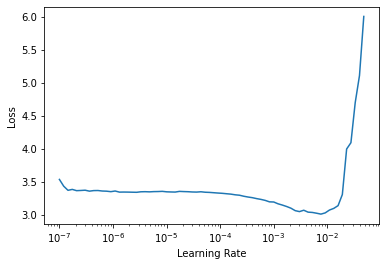

In [57]:
learn.lr_find()

In [58]:
learn.fit(n_epoch=50,lr=0.0007,wd=0.1)

epoch,train_loss,valid_loss,f1_score,time
0,2.595160,2.371284,0.370463,00:02
1,1.579850,1.733880,0.665318,00:02
2,0.875279,1.747935,0.690964,00:02
3,0.513748,2.364693,0.662674,00:02
4,0.314406,2.311125,0.697844,00:02
5,0.194253,2.480710,0.706783,00:02
6,0.132550,2.820989,0.685720,00:02
7,0.102447,2.174096,0.697460,00:02
8,0.074703,2.881153,0.694603,00:02
9,0.049217,2.503992,0.702935,00:02


KeyboardInterrupt: 

In [59]:
learn.show_results()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,Culture,Culture_pred
0,4.0,1371.0,1296.0,1.727804,1.744992,1.763991,1.784514,1.800863,1.805221,1.792318,1.640522,1.505495,1.373040,1.238852,1.099857,0.956611,0.809290,0.664392,0.519990,0.373741,0.225574,0.077260,-0.070550,-0.170786,-0.270040,-0.370160,-0.471691,-0.571871,-0.672700,-0.776679,-0.879049,-0.604454,-0.330854,-0.058631,0.209888,0.477230,0.741461,1.001698,1.257500,1.507387,1.749703,1.753919,1.757608,1.761793,1.765448,1.768491,1.771464,1.776371,1.782592,1.788856,1.796025,1.804981,1.813496,1.820814,1.828539,1.834637,1.839253,1.841482,1.840496,1.837198,1.831245,1.822819,1.812802,1.801941,1.790069,1.776921,1.763363,1.748070,1.734590,1.723850,1.711859,1.698883,1.685602,1.671290,1.656624,1.655431,1.680541,1.723201,1.775664,1.829758,1.877786,1.912433,1.926530,1.927711,1.929774,1.933552,1.937310,1.944252,1.950546,1.955807,1.958985,1.962702,1.966211,1.966437,1.961585,1.952822,1.939705,1.924570,1.906772,1.887400,1.866704,1.843504,1.816715,1.787158,1.756245,1.722705,1.689218,1.655426,1.621130,1.590867,1.562230,1.534943,1.508618,1.483088,1.458668,1.433981,1.409647,1.385424,1.361455,1.338572,1.316857,1.295623,1.274371,1.252733,1.230766,1.209299,1.188086,1.168574,1.149341,1.129609,1.110377,1.091374,1.071982,1.053318,1.035095,1.019016,1.004318,0.990042,0.977406,0.921399,0.839914,0.771822,0.703061,0.631810,0.558024,0.482659,0.405319,0.326633,0.245721,0.164402,0.081402,-0.002180,-0.086400,-0.169912,-0.255221,-0.340312,-0.426929,-0.514116,-0.600720,-0.687783,-0.773202,-0.856935,-0.938143,-1.016902,-1.095283,-1.168975,-1.235873,-1.294509,-1.345752,-1.393095,-1.431863,-1.467010,-1.497688,-1.522621,-1.551230,-1.581117,-1.618040,-1.614445,-1.584112,-1.566147,-1.547198,-1.527078,-1.513194,-1.498469,-1.484769,-1.469850,-1.457346,-1.445177,-1.433904,-1.423844,-1.414696,-1.405572,-1.398346,-1.395454,-1.370649,-1.344489,-1.318629,-1.294101,-1.272465,-1.252568,-1.235077,-1.218519,-1.202883,-1.189163,-1.176620,-1.163800,-1.150846,-1.137656,-1.124745,-1.110695,-1.072788,-1.018991,-0.953483,-0.880339,-0.803197,-0.726472,-0.654091,-0.575748,-0.487228,-0.401216,-0.331438,-0.292000,-0.293637,-0.309409,-0.318289,-0.327010,-0.334631,-0.342887,-0.351574,-0.360135,-0.369411,-0.379048,-0.389199,-0.399330,-0.410317,-0.421480,-0.432567,-0.444129,-0.456433,-0.468746,-0.480313,-0.492637,-0.502330,-0.508709,-0.511235,-0.511228,-0.508800,-0.503131,-0.494124,-0.483076,-0.471879,-0.461756,-0.455064,-0.449289,-0.446357,-0.447231,-0.451974,-0.462888,-0.480446,-0.502516,-0.529039,-0.559731,-0.590946,-0.622383,-0.651979,-0.679407,-0.701551,-0.718137,-0.729487,-0.737434,-0.744686,-0.752354,-0.758301,-0.765567,-0.772774,-0.778946,-0.785366,-0.792778,-0.799273,-0.807164,-0.816926,-0.826216,-0.834513,-0.841734,-0.848926,-0.853897,-0.858846,-0.862502,-0.866604,-0.870204,-0.872435,-0.873254,-0.871722,3.0,3.0
1,4.0,1099.0,1259.0,-1.160713,-1.155327,-1.147473,-1.137323,-1.127579,-1.115763,-1.101736,-1.085700,-1.068927,-1.051439,-1.0